In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import norm
import matplotlib.pyplot as plt
from matplotlib import style
from scipy.stats import multivariate_normal

style.use('fivethirtyeight')
np.random.seed(0)

# To remove warning while plotting
from matplotlib.axes._axes import _log as matplotlib_axes_logger
matplotlib_axes_logger.setLevel('ERROR')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Data Cleaning

In [ ]:
UcolNames = ['User_ID', 'Age', 'Sex', 'Occupation', 'ZIP_Code'] #Column names to extract data
Users = pd.read_csv('/content/drive/MyDrive/MLdata/100K/u.user',sep='|', names=UcolNames,encoding='latin-1') #Reading data according to col names

RcolNames = ['User_ID', 'Movie_ID', 'Rating', 'Timestamp'] #Column names to extract data
Ratings = pd.read_csv('/content/drive/MyDrive/MLdata/100K/u.data',sep='\t', names=RcolNames,encoding='latin-1') #Reading data according to col names

In [ ]:
# Users.shape
# Users.head()
# Ratings.shape
# Ratings.head()
# len(Ratings['Movie_ID'].unique())

In [ ]:
TotUsers = Users['User_ID'].nunique() #Total number of users
TotMovies = Ratings['Movie_ID'].nunique() #Total number of movies

In [ ]:
print(TotUsers)
print(TotMovies)

943
1682


# Rating Matrix

In [ ]:
#Creating a matrix with rows as user and columns as movies
RatingsMatrix = Ratings.pivot_table(index=['User_ID'],columns=['Movie_ID'],values='Rating').reset_index(drop=True)
print(RatingsMatrix)

Movie_ID  1     2     3     4     5     ...  1678  1679  1680  1681  1682
0          5.0   3.0   4.0   3.0   3.0  ...   NaN   NaN   NaN   NaN   NaN
1          4.0   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
2          NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
3          NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
4          4.0   3.0   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
..         ...   ...   ...   ...   ...  ...   ...   ...   ...   ...   ...
938        NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
939        NaN   NaN   NaN   2.0   NaN  ...   NaN   NaN   NaN   NaN   NaN
940        5.0   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
941        NaN   NaN   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN
942        NaN   5.0   NaN   NaN   NaN  ...   NaN   NaN   NaN   NaN   NaN

[943 rows x 1682 columns]


In [ ]:
TotZeros = np.where(RatingsMatrix == 3)
print(TotZeros)

(array([  0,   0,   0, ..., 942, 942, 942]), array([   1,    3,    4, ..., 1187, 1227, 1329]))


In [ ]:
RatingsMatrix.fillna(0, inplace = True)
DataMatrix = np.array(RatingsMatrix)

In [ ]:
print(DataMatrix)
DataMatrix.shape
#rows: Users
#Columns: Movies
#cells rating

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


(943, 1682)

In [ ]:
#Getting transpose of the DataMatrix to get the different user ratings for a single movie
DMt = np.transpose(DataMatrix)
print(DMt)
DMt.shape
#rows: Movies
#Columns: Users
#cells rating

[[5. 4. 0. ... 5. 0. 0.]
 [3. 0. 0. ... 0. 0. 5.]
 [4. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(1682, 943)

In [ ]:
X_tot = DMt[0] #Extracting user ratings for the first movie
print(X_tot)
X_tot.shape
len(X_tot)

[5. 4. 0. 0. 4. 4. 0. 0. 0. 4. 0. 0. 3. 0. 1. 5. 4. 5. 0. 3. 5. 0. 5. 0.
 5. 3. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 5. 0. 0. 4. 5. 5. 4. 5. 0. 0. 0.
 2. 0. 0. 0. 0. 4. 0. 4. 5. 5. 2. 0. 0. 2. 3. 4. 3. 3. 3. 0. 0. 4. 0. 4.
 2. 0. 4. 0. 5. 0. 4. 0. 4. 4. 4. 2. 0. 0. 0. 0. 5. 0. 0. 4. 5. 4. 5. 5.
 4. 0. 4. 0. 3. 3. 0. 0. 0. 4. 0. 4. 4. 0. 0. 0. 0. 0. 0. 0. 4. 0. 0. 4.
 4. 0. 0. 3. 4. 0. 0. 4. 0. 5. 4. 0. 0. 5. 0. 0. 3. 4. 0. 0. 3. 0. 0. 4.
 3. 0. 0. 4. 0. 4. 5. 0. 0. 0. 0. 0. 5. 4. 0. 4. 0. 4. 0. 0. 0. 0. 0. 5.
 0. 0. 0. 0. 0. 3. 0. 0. 3. 4. 0. 0. 3. 4. 0. 4. 0. 0. 0. 0. 5. 0. 0. 0.
 4. 4. 0. 0. 0. 4. 1. 5. 3. 3. 3. 2. 0. 0. 0. 0. 5. 5. 0. 0. 2. 0. 0. 4.
 0. 0. 0. 0. 0. 4. 4. 0. 0. 0. 0. 0. 0. 5. 3. 4. 0. 3. 4. 0. 0. 0. 0. 0.
 0. 4. 4. 4. 0. 4. 4. 3. 4. 4. 4. 5. 5. 3. 0. 5. 0. 0. 0. 0. 0. 3. 5. 0.
 5. 0. 0. 3. 0. 0. 3. 0. 0. 4. 4. 5. 4. 0. 3. 4. 0. 0. 0. 0. 0. 4. 5. 0.
 3. 5. 5. 4. 2. 5. 4. 5. 3. 5. 3. 0. 4. 0. 5. 0. 5. 0. 5. 4. 0. 0. 4. 5.
 4. 5. 0. 0. 0. 0. 0. 3. 0. 2. 0. 5. 2. 3. 4. 0. 0.

943

# GMM implementation

In [ ]:
class GMM:
    def __init__(self,X,iterations):
        self.iterations = iterations
        self.X = X
        self.mu = None
        self.pi = None
        self.var = None
        
    def run(self):
        # Initialization of mean, mixture weights and variation
        self.mu = [-8,8,5]
        self.pi = [1/3,1/3,1/3]
        self.var = [2.5,1.5,0.7]
        
        # No. of gaussians
        K = 3;
        
        # Initializtion of gaussians
        gauss_1 = norm(loc=self.mu[0],scale=self.var[0])
        gauss_2 = norm(loc=self.mu[1],scale=self.var[1])
        gauss_3 = norm(loc=self.mu[2],scale=self.var[2])
        
        # For calculating log_likelihoods
        log_likelihoods=[]
        l=[]
        
        for iter in range(self.iterations):

            # E-Step
        
            # Create responsibility with (nxK)
            r = np.zeros((len(self.X),K))
            
            # Probability for each datapoint x_n to belong to gaussian g    
            for k,g,p in zip(range(K),[gauss_1, gauss_2, gauss_3],self.pi):
                r[:,k] = p*g.pdf(self.X)
                # Write the probability that x belongs to gaussian k in column k.
                # There with we get a 60x3 array filled with the probability that each x_n belongs to one of the gaussians
            
            # Normalize the responsibilities
            # so that row of r sums to 1
            for n in range(len(r)):
                r[n] = r[n]/(np.sum(self.pi)*np.sum(r,axis=1)[n])
            
            # Plot the data points
            # If condition for initial and final plot
            if(iter==0 or iter==self.iterations-1):
                fig = plt.figure(figsize=(5,5))
                ax0 = fig.add_subplot(111)
                ax0.set_xlabel('x')
                ax0.set_ylabel('p(x)')
                if (iter==0):
                    ax0.set_title('Initial Gaussians')
                else:
                    ax0.set_title('Final Gaussians')
                
                for n in range(len(r)):
                    ax0.scatter(self.X[n],0,c=np.array([r[n][0],r[n][1],r[n][2]]),s=100)
                # Plot the gaussians
                for g,c in zip([gauss_1.pdf(np.linspace(-20,20,num=60)), gauss_2.pdf(np.linspace(-20,20,num=60)), gauss_3.pdf(np.linspace(-20,20,num=60))],['r','g','b']):
                    ax0.plot(np.linspace(-20,20,num=60),g,c=c)
            
            # M-Step
            # Calculate total no. of component allocated to cluster k
            n_k = []
            for k in range(K):
                nk = np.sum(r[:,k])
                n_k.append(nk) # For each cluster c, calculate the m_c and add it to the list m_c
            
            # Update mixture weights
            for k in range(K):
                self.pi[k] = (n_k[k]/np.sum(n_k)) # For each cluster c,calculate the fraction of points pi_c which belongs to cluster c
            
            # Update mean
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/n_k
            
            # Update variance
            var_k = []
            for k in range(K):
                var_k.append((1/n_k[k])*np.dot(((np.array(r[:,k]).reshape(len(self.X),1))*(self.X.reshape(len(self.X),1)-self.mu[k])).T,(self.X.reshape(len(self.X),1)-self.mu[k])))
            
            # Update the gaussian
            gauss_1 = norm(loc=self.mu[0],scale=self.var[0])
            gauss_2 = norm(loc=self.mu[1],scale=self.var[1])
            gauss_3 = norm(loc=self.mu[2],scale=self.var[2])
            
            plt.show()
            log_likelihoods.append(np.log(np.sum([p*multivariate_normal(self.mu[i],self.var[j]).pdf(self.X) for p,i,j in zip(self.pi,range(len(self.mu)),range(len(self.var)))])))
          
        # Plot the log likelihood
        fig2 = plt.figure(figsize=(5,5))
        ax1 = fig2.add_subplot(111)
        ax1.set_title('Log-Likelihood value after each iteration')
        ax1.set_xlabel('No. of Iterations')
        ax1.set_ylabel('Log-likelihood')
        
        ax1.plot(range(1,self.iterations+1,1),log_likelihoods)

        print("Final iteration R: ")
        print(r)

        #Calculating the new responsibilities after finalizing the curves

        # Probability for each datapoint x_n to belong to gaussian g    
        for k,g,p in zip(range(K),[gauss_1, gauss_2, gauss_3],self.pi):
          r[:,k] = p*g.pdf(self.X)
        # Write the probability that x belongs to gaussian k in column k.
        # Normalize the responsibilities
        # so that row of r sums to 1
        for n in range(len(r)):
          r[n] = r[n]/(np.sum(self.pi)*np.sum(r,axis=1)[n])

        print("Means: " + str(self.mu[0]) + " " + str(self.mu[1]) + " " + str(self.mu[2]))
        print("Variances: " + str(self.var[0]) + " " + str(self.var[1]) + " " + str(self.var[2]))
        print("Weights: " + str(self.pi[0]) + " " + str(self.pi[1]) + " " + str(self.pi[2]))
        print(r)

        # for i in range(0,len(self.pi)-1):
        #   if self.pi[i] > self.pi[i+1]:
        #     max_mu = self.mu[i]
        #   else:
        #     max_mu = self.mu[i+1]

        return self.mu,self.var,self.pi,r

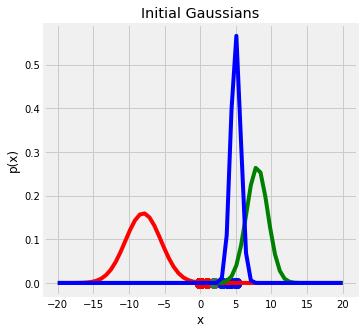

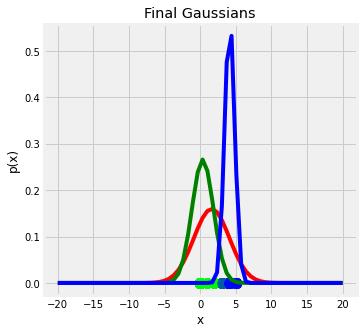

Final iteration R: 
[[3.93850774e-04 1.22184001e-02 9.87387749e-01]
 [2.97672534e-04 3.66921847e-02 9.63010143e-01]
 [5.59293886e-04 9.99440672e-01 3.40560995e-08]
 ...
 [3.93850774e-04 1.22184001e-02 9.87387749e-01]
 [5.59293886e-04 9.99440672e-01 3.40560995e-08]
 [5.59293886e-04 9.99440672e-01 3.40560995e-08]]
Means: 1.6139546299688123 0.35692546134534375 4.148763808758495
Variances: 2.5 1.5 0.7
Weights: 0.0005456351950636163 0.603512005119704 0.3959423596852323
[[3.18944969e-04 1.22213661e-02 9.87459689e-01]
 [2.41038876e-04 3.66980860e-02 9.63060875e-01]
 [4.52860236e-04 9.99547106e-01 3.40644531e-08]
 ...
 [3.18944969e-04 1.22213661e-02 9.87459689e-01]
 [4.52860236e-04 9.99547106e-01 3.40644531e-08]
 [4.52860236e-04 9.99547106e-01 3.40644531e-08]]


(array([1.61395463, 0.35692546, 4.14876381]),
 [2.5, 1.5, 0.7],
 [0.0005456351950636163, 0.603512005119704, 0.3959423596852323],
 array([[3.18944969e-04, 1.22213661e-02, 9.87459689e-01],
        [2.41038876e-04, 3.66980860e-02, 9.63060875e-01],
        [4.52860236e-04, 9.99547106e-01, 3.40644531e-08],
        ...,
        [3.18944969e-04, 1.22213661e-02, 9.87459689e-01],
        [4.52860236e-04, 9.99547106e-01, 3.40644531e-08],
        [4.52860236e-04, 9.99547106e-01, 3.40644531e-08]]))

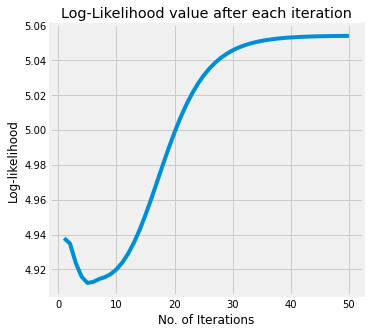

In [ ]:
GMM = GMM(X_tot,50)
GMM.run()

# Final GMM.fit function

In [ ]:
class GMMfit:
    def __init__(self,X_2d,iterations):
        self.iterations = iterations
        self.X_2d = X_2d
        self.mu = None
        self.pi = None
        self.var = None
        self.Means = []
        self.Variances = []
        self.Weights = []
        self.Res = []
        self.X = None
    

    def run(self):
      for i in range(0,len(self.X_2d)): #Iterating through all the movies
        self.X = self.X_2d[i] #Selecting single Movie
        # Initialization of mean, mixture weights and variation
        self.mu = [-8,8,5]
        self.pi = [1/3,1/3,1/3]
        self.var = [2.5,1.5,0.7]
        
        # No. of gaussians
        K = 3;

        # Initializtion of gaussians
        gauss_1 = norm(loc=self.mu[0],scale=self.var[0])
        gauss_2 = norm(loc=self.mu[1],scale=self.var[1])
        gauss_3 = norm(loc=self.mu[2],scale=self.var[2])
        
        # For calculating log_likelihoods
        log_likelihoods=[]
        l=[]
        
        for iter in range(self.iterations):

            # E-Step
        
            # Create responsibility with (nxK)
            r = np.zeros((len(self.X),K))
            
            # Probability for each datapoint x_n to belong to gaussian g    
            for k,g,p in zip(range(K),[gauss_1, gauss_2, gauss_3],self.pi):
                r[:,k] = p*g.pdf(self.X)
                # Write the probability that x belongs to gaussian k in column k.
                # There with we get a 60x3 array filled with the probability that each x_n belongs to one of the gaussians
            
            # Normalize the responsibilities
            # so that row of r sums to 1
            for n in range(len(r)):
                r[n] = r[n]/(np.sum(self.pi)*np.sum(r,axis=1)[n])
            
            
            # M-Step
            # Calculate total no. of component allocated to cluster k
            n_k = []
            for k in range(K):
                nk = np.sum(r[:,k])
                n_k.append(nk) # For each cluster c, calculate the m_c and add it to the list m_c
            
            # Update mixture weights
            for k in range(K):
                self.pi[k] = (n_k[k]/np.sum(n_k)) # For each cluster c,calculate the fraction of points pi_c which belongs to cluster c
            
            # Update mean
            self.mu = np.sum(self.X.reshape(len(self.X),1)*r,axis=0)/n_k
            
            # Update variance
            var_k = []
            for k in range(K):
                var_k.append((1/n_k[k])*np.dot(((np.array(r[:,k]).reshape(len(self.X),1))*(self.X.reshape(len(self.X),1)-self.mu[k])).T,(self.X.reshape(len(self.X),1)-self.mu[k])))
            
            # Update the gaussian
            gauss_1 = norm(loc=self.mu[0],scale=self.var[0])
            gauss_2 = norm(loc=self.mu[1],scale=self.var[1])
            gauss_3 = norm(loc=self.mu[2],scale=self.var[2])
            
            log_likelihoods.append(np.log(np.sum([p*multivariate_normal(self.mu[i],self.var[j]).pdf(self.X) for p,i,j in zip(self.pi,range(len(self.mu)),range(len(self.var)))]))) 

        #Calculating the new responsibilities after finalizing the curves

        # Probability for each datapoint x_n to belong to gaussian g    
        for k,g,p in zip(range(K),[gauss_1, gauss_2, gauss_3],self.pi):
          r[:,k] = p*g.pdf(self.X)
        # Write the probability that x belongs to gaussian k in column k.
        # Normalize the responsibilities
        # so that row of r sums to 1
        for n in range(len(r)):
          r[n] = r[n]/(np.sum(self.pi)*np.sum(r,axis=1)[n])      
        
        self.Means.append(self.mu)
        self.Variances.append(self.var)
        self.Weights.append(self.pi)
        self.Res.append(r)

      return self.Means, self.Variances, self.Weights, self.Res

In [ ]:
GMMfit = GMMfit(DMt[:10,:],50)
Means,Variance,Weights,R = GMMfit.run()
print(Means)
print(Variance)
print(Weights)
print(R)

Streaming output truncated to the last 5000 lines.
       [3.43566004e-06, 9.99996564e-01, 2.29482918e-20],
       [3.43566004e-06, 9.99996564e-01, 2.29482918e-20]]), array([[2.98456452e-07, 9.99999702e-01, 4.69528352e-36],
       [2.98456452e-07, 9.99999702e-01, 4.69528352e-36],
       [2.98456452e-07, 9.99999702e-01, 4.69528352e-36],
       ...,
       [2.98456452e-07, 9.99999702e-01, 4.69528352e-36],
       [2.98456452e-07, 9.99999702e-01, 4.69528352e-36],
       [2.98456452e-07, 9.99999702e-01, 4.69528352e-36]]), array([[5.94220450e-07, 9.99999406e-01, 3.74619969e-38],
       [5.94220450e-07, 9.99999406e-01, 3.74619969e-38],
       [5.94220450e-07, 9.99999406e-01, 3.74619969e-38],
       ...,
       [5.94220450e-07, 9.99999406e-01, 3.74619969e-38],
       [5.94220450e-07, 9.99999406e-01, 3.74619969e-38],
       [5.94220450e-07, 9.99999406e-01, 3.74619969e-38]]), array([[3.18743893e-21, 8.00977397e-14, 1.00000000e+00],
       [3.18743893e-21, 8.00977397e-14, 1.00000000e+00],
       